In [2]:
import sys
import os
src_path = os.path.join(os.getcwd(), '..')
sys.path.append(src_path)

import matplotlib.pyplot as plt
import torch
import numpy as np

from src.train_and_eval import get_default_dataset
from src.models import VariationalAutoencoder

In [3]:
vae = VariationalAutoencoder(
    input_shape=(1, 64, 64),
    latent_space_dim=128,
    encoder_conv_channels=(16, 32, 32, 64, 64),
    encoder_conv_kernel_size=(3, 3, 3, 3, 3),
    encoder_conv_stride=(2, 2, 2, 2, 2),
    encoder_conv_padding=(1, 1, 1, 1, 1),
    decoder_conv_t_channels=(64, 32, 16, 16, 1),
    decoder_conv_t_kernel_size=(3, 3, 3, 3, 3),
    decoder_conv_t_stride=(2, 2, 2, 2, 2),
    decoder_conv_t_padding=(1, 1, 1, 1, 1),
    eps=0.001
)
vae.load_state_dict(torch.load("../train_logs/tr1_eps=0.001_model.pth", weights_only=True))
vae.eval()

VariationalAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
  )
  (mean_linear): Linear(in_features=256, out_features=128, bias=True)
  (logvar_linear): Linear(in_features=256, out_features=128, bias=True)
  (decoder_linear): Linear(in_features=128, out_features=256, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4)

In [4]:
def predict_and_plot(model, ds, size):
    plt.figure(figsize=(5, 20))
    indices = np.random.randint(0, len(ds), size)
    for (i, index)in enumerate(indices):
        x = ds[index][0]
        plt.subplot(size*2, 2, 2*i+1)
        plt.imshow(torch.movedim(x, 0, 2), cmap="gray")
        plt.axis('off')

        model.eval()
        pred, mean, logvar = model(torch.unsqueeze(x, 0))
        pred = pred.detach()[0]
        plt.subplot(size*2, 2, 2*i+2)
        plt.imshow(torch.movedim(pred, 0, 2), cmap="gray")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
ds = get_default_dataset()

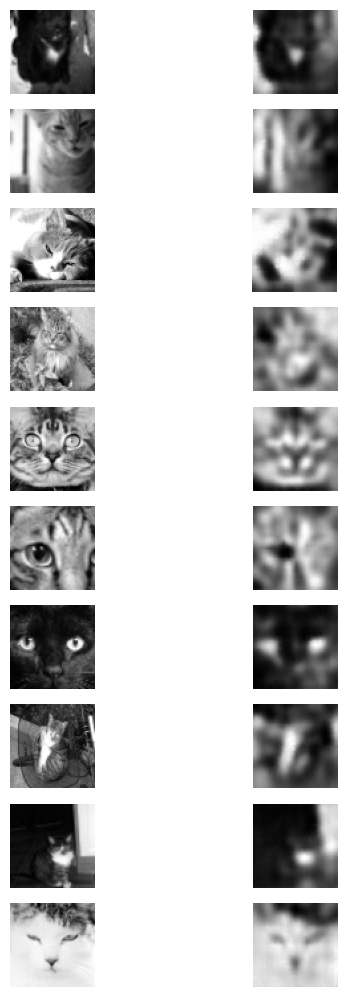

In [6]:
predict_and_plot(vae, ds, 10)

In [7]:
def interpolate(model, x1, x2, row, col):
    cnt = row*col-2
    plt.figure(figsize=(5, 5))
    mean1, _ = model.encode(torch.unsqueeze(x1, 0))
    mean2, _ = model.encode(torch.unsqueeze(x2, 0))
    for (i, a) in enumerate(np.linspace(0, 1, cnt)):
        r = a*mean1 + (1-a)*mean2
        model.eval()
        pred = model.decode(r)
        pred = pred[0].detach()
        plt.subplot(row, col, i+2)
        plt.imshow(torch.movedim(pred, 0, 2), cmap="gray")
        plt.axis('off')

    plt.subplot(row, col, 1)
    plt.imshow(torch.movedim(x2, 0, 2), cmap="gray")
    plt.axis('off')

    plt.subplot(row, col, cnt+2)
    plt.imshow(torch.movedim(x1, 0, 2), cmap="gray")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

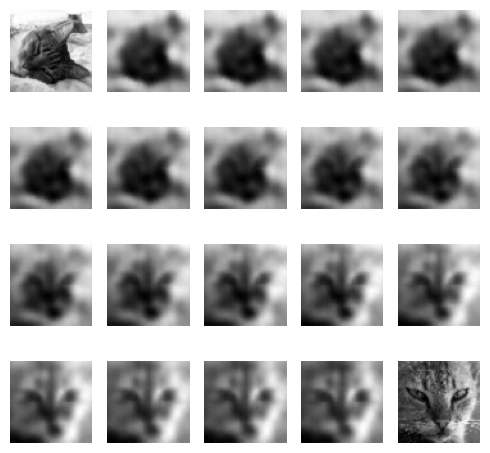

In [8]:
x1 = ds[15234][0]
x2 = ds[39627][0]
interpolate(vae, x1, x2, 4, 5)